In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [12]:
df=pd.read_csv('fake_train.csv')
df.head(3)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [13]:
df.shape

(20800, 5)

In [14]:
df=df.dropna()

In [15]:
df.shape

(18285, 5)

In [16]:
X=df.drop('label',axis=1)
y=df['label']

In [17]:
# Text Preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [18]:
data = df.copy()

In [19]:
data.reset_index(inplace=True)

In [20]:
#Removing all the stopwords / Special character from the text
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ',data['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] 
#here first we will go from every word in review and if there is a word which is not ENGLISH word #
#or [he,she]words with lesser importance then we will do there stemming.
    review = ' '.join(review)
    corpus.append(review)
    
# here we are cleaning all the text, making it lower case. and splitting it.

In [21]:
# creatinng bag of words
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [22]:
X.shape

(18285, 5000)

In [23]:
y=data['label']

In [24]:
y.shape

(18285,)

In [25]:
# dividing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [26]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [27]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#this is a custom way to plot confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm 

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [30]:
from sklearn import metrics
import itertools

accuracy = : 0.9019055509527755
Confusion matrix, without normalization


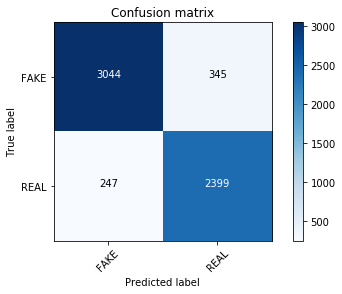

In [31]:
nb.fit(X_train,y_train)
pred=nb.predict(X_test)
scor=metrics.accuracy_score(y_test,pred)
print('accuracy = :',scor)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])



# Passive Aggressive Algorithm 

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.918
Confusion matrix, without normalization


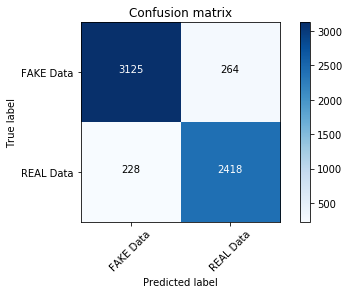

In [33]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Multinomial Classifier with Hyperparameter 

In [34]:
classifier=MultinomialNB(alpha=0.1)

In [35]:

previous_score=0
for alpha in np.arange(0,1,0.05):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.05, Score : 0.9000828500414251
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.15000000000000002, Score : 0.9024026512013256
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.25, Score : 0.9020712510356255
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.35000000000000003, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.45, Score : 0.9015741507870754
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.55, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.65, Score : 0.9025683512841757
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.75, Score : 0.9020712510356255
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.8500000000000001, Score : 0.9012427506213753
Alpha: 0.9, Score : 0.9017398508699255
Alpha: 0.9500000000000001, Score : 0.9019055509527755


In [36]:
## Get Features names
feature_names = cv.get_feature_names()
classifier.coef_[0]

array([ -9.09591533,  -8.62213098,  -9.09591533, ..., -10.7465962 ,
        -8.91191169,  -9.32158733])

In [37]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.005765826702355, 'trump'),
 (-4.293468630343174, 'hillari'),
 (-4.401976051759193, 'clinton'),
 (-4.9054956508854906, 'elect'),
 (-5.182075791957633, 'new'),
 (-5.24019548758055, 'comment'),
 (-5.279424749605594, 'video'),
 (-5.392246783997566, 'war'),
 (-5.402249368019838, 'us'),
 (-5.417443380247136, 'hillari clinton'),
 (-5.422559789464169, 'fbi'),
 (-5.48609001342756, 'vote'),
 (-5.571636588834474, 'email'),
 (-5.583616366726792, 'world'),
 (-5.639375621604813, 'obama'),
 (-5.739828021973795, 'donald'),
 (-5.768411604229481, 'donald trump'),
 (-5.790398565428762, 'russia'),
 (-5.851509596742088, 'day'),
 (-5.867389247611814, 'america')]

In [38]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:21400]

[(-10.746596199280326, 'abe'),
 (-10.746596199280326, 'abroad'),
 (-10.746596199280326, 'abus new'),
 (-10.746596199280326, 'abus new york'),
 (-10.746596199280326, 'act new'),
 (-10.746596199280326, 'act new york'),
 (-10.746596199280326, 'advic'),
 (-10.746596199280326, 'advis new'),
 (-10.746596199280326, 'advis new york'),
 (-10.746596199280326, 'age new'),
 (-10.746596199280326, 'age new york'),
 (-10.746596199280326, 'agenda breitbart'),
 (-10.746596199280326, 'ail'),
 (-10.746596199280326, 'aleppo new'),
 (-10.746596199280326, 'aleppo new york'),
 (-10.746596199280326, 'ali'),
 (-10.746596199280326, 'america breitbart'),
 (-10.746596199280326, 'america new york'),
 (-10.746596199280326, 'american breitbart'),
 (-10.746596199280326, 'american new'),
 (-10.746596199280326, 'american new york'),
 (-10.746596199280326, 'ami'),
 (-10.746596199280326, 'ami schumer'),
 (-10.746596199280326, 'amp'),
 (-10.746596199280326, 'ann'),
 (-10.746596199280326, 'ann coulter'),
 (-10.746596199280